In [ ]:
#import dataset from kaggle
import kagglehub

path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'toronto-emotional-speech-set-tess' dataset.
Path to dataset files: /kaggle/input/toronto-emotional-speech-set-tess


In [ ]:
#import neccessary libraries use in this project
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load the dataset
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
#display number of element in the paths
len(paths)

2800

In [ ]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
#create pandas DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [ ]:
#Display unique labels along with counts
df['label'].value_counts()

,count
label,
fear,400
angry,400
disgust,400
neutral,400
sad,400
ps,400
happy,400


<Axes: xlabel='label', ylabel='count'>

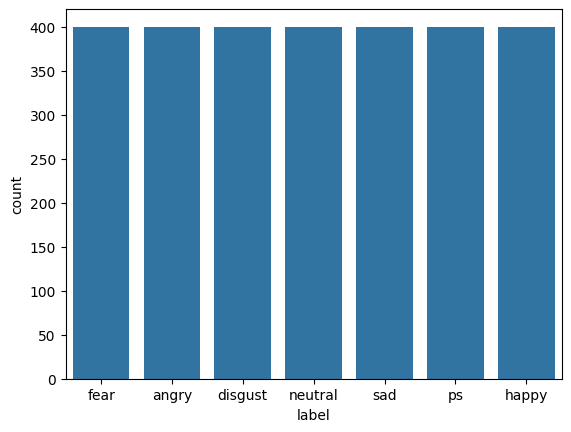

In [ ]:
#Create countplot graph
sns.countplot(data=df, x='label')

In [ ]:
#Help to visualize the audio waveforms for different emotions
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

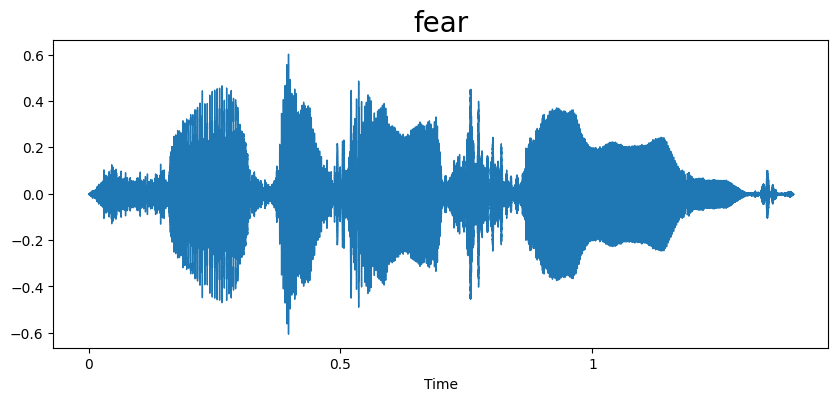

In [ ]:
#Using waveplot function plot figure and play an audio file
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

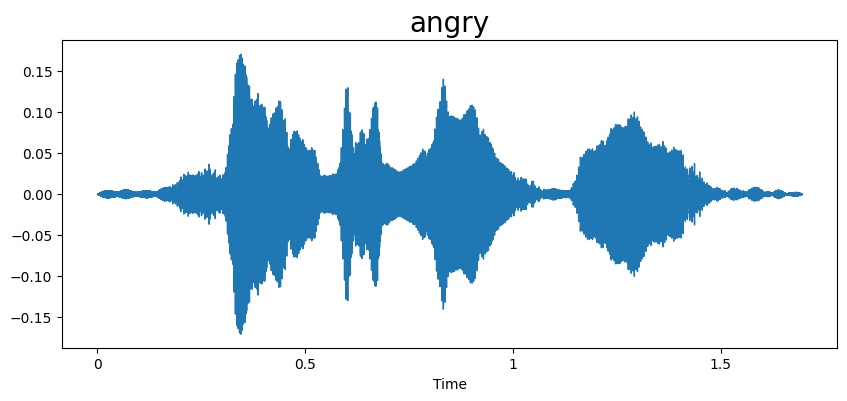

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
Audio(path)

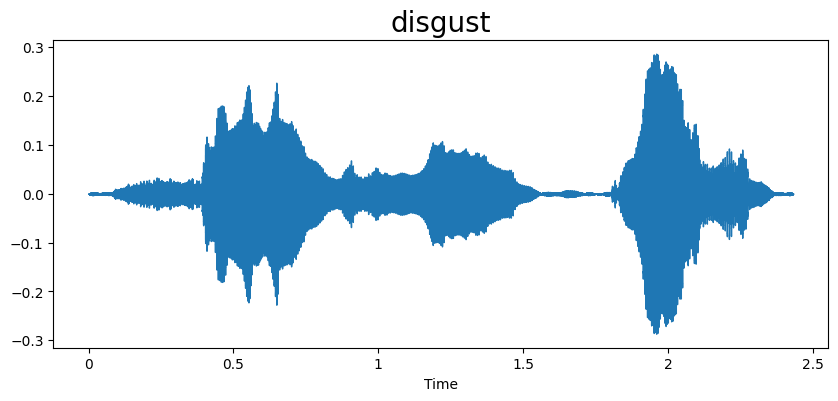

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
Audio(path)

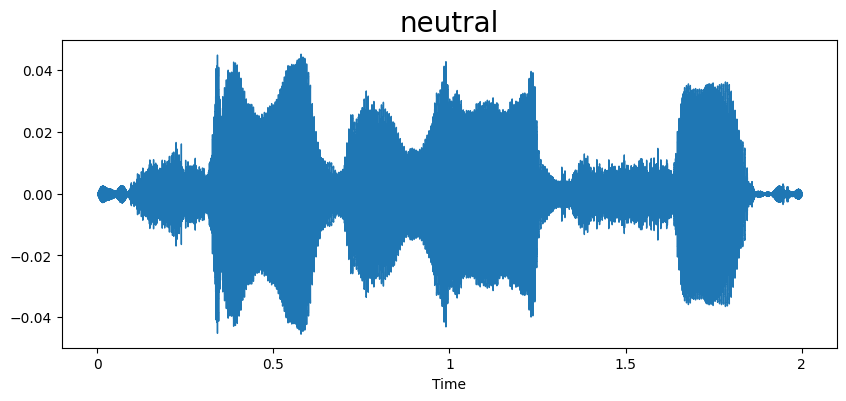

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
Audio(path)

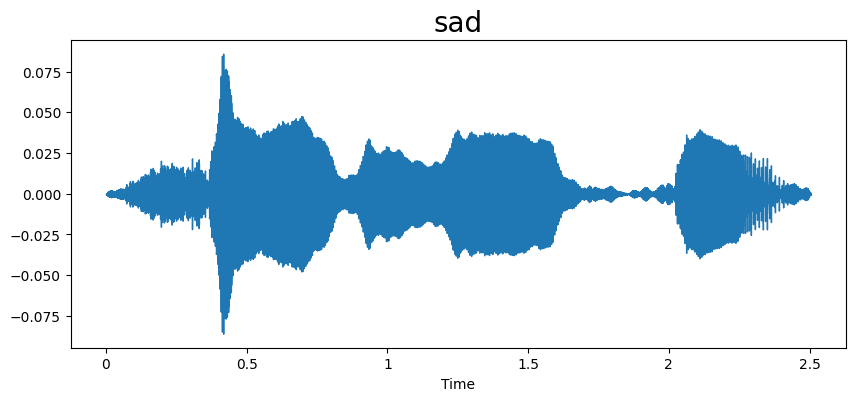

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
Audio(path)

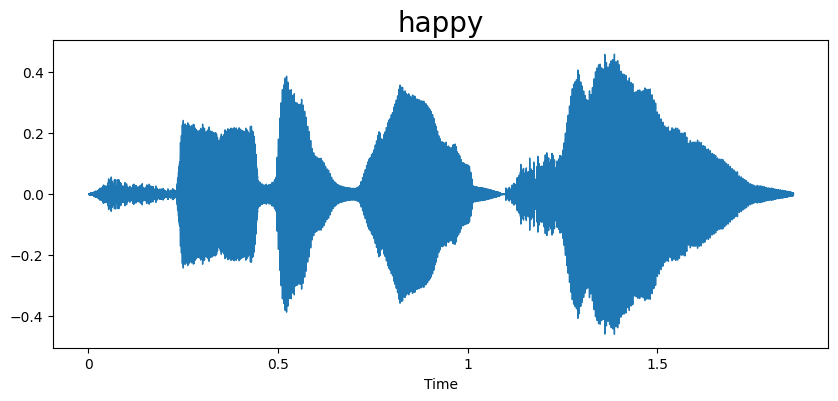

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
#Converts an audio file into a fixed-size numerical representation
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689117,   22.12553  ,
        -14.757396 ,   11.051346 ,   12.412449 ,   -3.000262 ,
          1.0844991,   11.078272 ,  -17.41966  ,   -8.093214 ,
          6.5879736,   -4.2209525,   -9.15508  ,    3.5214806,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.57464  ,   16.325035 ,   -3.8427284,    0.8962968,
        -11.239262 ,    6.653461 ,   -2.5883696,   -7.7140164,
        -10.941657 ,   -2.4007547,   -5.2812862,    4.271157 ,
        -11.202218 ,   -9.024621 ,   -3.6669848,    4.869744 ,
         -1.6027985,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-285.73727, 85.78295, -2.1689117, 22.12553, -..."
1,"[-348.34332, 35.193233, -3.841328, 14.658875, ..."
2,"[-340.11435, 53.796444, -14.267782, 20.884031,..."
3,"[-306.63422, 21.259708, -4.4110823, 6.487155, ..."
4,"[-344.7548, 46.329193, -24.171413, 19.392921, ..."
...,...
2795,"[-374.3952, 60.864998, 0.025059033, 8.431058, ..."
2796,"[-313.9648, 39.847843, -5.6493053, -3.867575, ..."
2797,"[-357.54886, 77.88605, -15.224756, 2.1946332, ..."
2798,"[-353.1474, 101.68391, -14.175898, -12.037377,..."


In [ ]:
#converts pandas Series of X_mfcc into a NumPy array and then reshape
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
#performs one-hot encoding on the label column of the DataFrame
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
#Converts the sparse matrix y into a dense NumPy array
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
e#Dsigned to classify speech based on its emotional content using MFCC features as input
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.5178 - loss: 1.4401 - val_accuracy: 0.1929 - val_loss: 2.5894
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.8368 - loss: 0.4556 - val_accuracy: 0.1393 - val_loss: 2.4297
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9239 - loss: 0.2328 - val_accuracy: 0.3929 - val_loss: 2.1488
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.9464 - loss: 0.1633 - val_accuracy: 0.4054 - val_loss: 2.0771
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.9670 - loss: 0.1032 - val_accuracy: 0.2911 - val_loss: 3.1748
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9710 - loss: 0.1062 - val_accuracy: 0.3821 - val_loss: 3.2376
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9635 - loss: 0.1189 - val_accuracy: 0.2875 - val_loss: 3.6188
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9717 - loss: 0.0823 - val_accuracy:

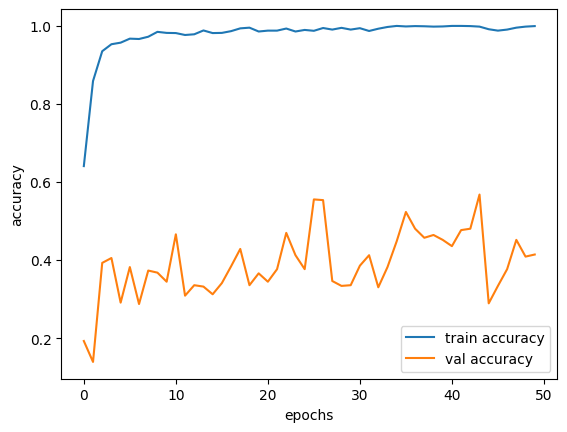

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

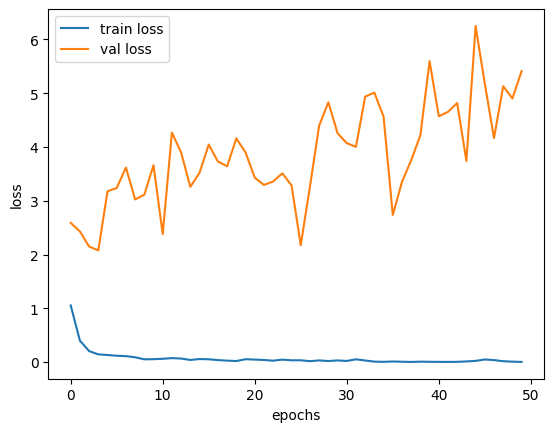

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()